In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [3]:
df = pd.read_csv("/Users/emilywu/Desktop/MMA/Text Analysis/Party_Animal_Steam_Review_Data_processed.csv")

In [6]:
df.head()

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,steam_china_location,timestamp_dev_responded,developer_response,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,157603005,english,Fun game to play when you've had a long day an...,1707077354,1707077354,True,0,0,0.0,0,...,NaN,NaN,NaN,76561199401546423,0,1,2027,322,1986,1707079884
1,157602265,english,Pros:\n-Animals\n-Party\n-Funny mechanics\n-A ...,1707076676,1707076676,True,0,0,0.0,0,...,NaN,NaN,NaN,76561198056822321,0,2,316,316,316,1707076353
2,157598111,english,10/10 Would drop kick a cat without feeling bad,1707072837,1707072837,True,0,1,0.0,0,...,NaN,NaN,NaN,76561198428748427,0,1,847,410,804,1707075660
3,157592673,english,"Very fun game. The animals are very cute, the ...",1707068019,1707068019,True,0,0,0.0,0,...,NaN,NaN,NaN,76561197987140501,0,10,7864,600,7712,1707109536
4,157588222,english,Game has been out for 4 months and they only a...,1707064205,1707064205,False,0,0,0.0,0,...,NaN,NaN,NaN,76561198024864749,375,17,1456,0,1456,1701029993


### POS tagging for fetching important attributes

In [4]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')



# Define a function to find patterns like adjective-noun and noun-adjective
def find_adj_noun_patterns(text):
    # Tokenize and POS tag
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    
    # Look for patterns: adjective followed by a noun and noun followed by an adjective
    patterns = []
    for i in range(len(tags) - 1):
        word1, tag1 = tags[i]
        word2, tag2 = tags[i + 1]
        if (tag1 in ['JJ', 'JJR', 'JJS'] and tag2 in ['NN', 'NNS']) or \
           (tag1 in ['NN', 'NNS'] and tag2 in ['JJ', 'JJR', 'JJS']):
            patterns.append(word1 + ' ' + word2)
    return patterns




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emilywu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/emilywu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilywu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Apply the function to each review
df['review'] = df['review'].astype(str)
df['review'] = df['review'].str.lower()
df['review'] = df['review'].str.replace('-', '')
df['review'] = df['review'].str.replace('*', '')
df['attributes_patterns'] = df['review'].apply(find_adj_noun_patterns)

# Now, df['attributes_patterns'] contains the patterns for each review
print(df[['review', 'attributes_patterns']])

/var/folders/_t/sfl_18tn7170tw9l_k83zly40000gn/T/ipykernel_7478/1912619969.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['review'] = df['review'].str.replace('*', '')


                                                  review  \
0      fun game to play when you've had a long day an...   
1      pros:\nanimals\nparty\nfunny mechanics\na bunc...   
2        10/10 would drop kick a cat without feeling bad   
3      very fun game. the animals are very cute, the ...   
4      game has been out for 4 months and they only a...   
...                                                  ...   
10561  a wildly fun time, but penguins are missing!\n...   
10562                    needs more penguins, great game   
10563  { ☑graphics☑ }\n☐ you forget what reality is\n...   
10564  i remember laughing this hard with friends in ...   
10565  [h1] do not trust the negative reviews! [/h1]\...   

                                     attributes_patterns  
0                        [long day, fun easy, easy game]  
1      [party funny, funny mechanics, short while, ra...  
2                                                     []  
3                       [fun game, new skin

In [18]:
pattern_series = df['attributes_patterns'].explode()
pattern_counts = pattern_series.value_counts().reset_index()

# Rename the columns appropriately
pattern_counts.columns = ['attributes_patterns', 'frequency']

In [17]:
filtered_rows = pd.concat([
    pattern_counts.iloc[0:3, :],  # First three rows
    pattern_counts.iloc[4:15, :]  # Rows 5 to 15 (skipping the 4th row)
])
print(filtered_rows)

   attributes_patterns  frequency
0            good game        365
1             fun game        336
2           great game        327
4         offline mode        201
5             much fun        198
6     negative reviews        196
7            super fun        159
8            best game        117
9          gang beasts        105
10  micro transactions         94
11           long time         90
12        offline play         86
13          funny game         83
14        amazing game         83


In [6]:

from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
def fetch_words_by_pos(text):
    tokens = word_tokenize(text)
    tags = pos_tag(tokens)
    
    words_by_pos = []
    
    for word, tag in tags:
        if tag in ['JJ', 'JJR', 'JJS']:
            words_by_pos.append(word)
        elif tag in ['NN', 'NNS', 'NNP', 'NNPS']:
            words_by_pos.append(word)
        elif tag in ['RB', 'RBR', 'RBS']:
            words_by_pos.append(word)
        elif tag.startswith('VB'):
            words_by_pos.append(word)
    
    return words_by_pos



# Apply the function to each review and store the result in a new column
df['POS_all'] = df['review'].apply(fetch_words_by_pos)

# Display the updated DataFrame
print(df['POS_all'])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emilywu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/emilywu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [fun, game, play, 've, had, long, day, just, w...
1        [pros, animals, party, funny, mechanics, bunch...
2                          [drop, kick, cat, feeling, bad]
3        [very, fun, game, animals, are, very, cute, mu...
4        [game, has, been, months, only, added, level, ...
                               ...                        
10561    [wildly, fun, time, penguins, are, missing, pa...
10562                 [needs, more, penguins, great, game]
10563    [☑graphics☑, ☐, forget, reality, is, ☐, beauti...
10564    [i, remember, laughing, hard, friends, era, n6...
10565    [[, h1, ], do, not, trust, negative, reviews, ...
Name: POS_all, Length: 10566, dtype: object


In [7]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import re

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to clean and preprocess text list
def clean_text_list(text_list):
    # Convert list to string for processing
    text = ' '.join(text_list)
    # Apply cleaning steps
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r"https?://[^\s]+", "", text)
    text = re.sub(r'@[A-Za-z0-9\_]+', ' ', text)
    text = re.sub(r'\#[A-Za-z0-9\_]+', ' ', text)
    text = re.sub('southwest|airline', ' ', text)
    # Lemmatize and remove stop words
    cleaned_text = ' '.join([token.lemma_ for token in nlp(text) if not token.is_stop])
    # Remove multiple spaces
    cleaned_text = re.sub(r' +', ' ', cleaned_text)
    return cleaned_text.strip()

# Apply the clean_text_list function to each list in the df['POS_all'] column
df['cleaned_POS_all'] = df['POS_all'].apply(clean_text_list)

# Convert cleaned documents into a list
all_documents = df['cleaned_POS_all'].tolist()

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=15, # include only the top 15 words
                             token_pattern='[a-zA-Z0-9]{3,}') # include words with more than 3 characters

# Transform the documents into a document-term matrix
dtm = vectorizer.fit_transform(all_documents)

# Extract feature names
feature_names = vectorizer.get_feature_names_out()


In [30]:
import numpy as np
import pandas as pd

# Sum word frequencies across all documents
word_frequencies = np.sum(dtm.toarray(), axis=0)

# Create a DataFrame with feature names and their corresponding frequencies
frequency_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print(frequency_df)


      Word  Frequency
0     game      10449
1      fun       4452
2     play       3734
3   friend       2736
4     good       1940
5   animal       1523
6    party       1292
7     time       1003
8    great        983
9   people        929
10    skin        861
11    mode        854
12    gang        844
13   beast        839
14  review        802


In [11]:

# Save the DataFrame to a CSV file
output_file_path = '/Users/emilywu/Desktop/MMA/Text Analysis/POS_reviews1.csv'  # Specify your file path here
df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")


DataFrame saved to /Users/emilywu/Desktop/MMA/Text Analysis/POS_reviews1.csv


In [6]:
from collections import Counter

#  df['attributes_patterns'] contains lists of (word1, word2) tuples as patterns

# Flatten all the lists in the column into one big list
all_patterns = [pattern for sublist in df['attributes_patterns'] for pattern in sublist]

# Count the occurrences of each pattern
pattern_counts = Counter(all_patterns)

# Get the top 100 most common patterns
top_100_patterns = pattern_counts.most_common(100)

# Convert top 100 patterns to a DataFrame for easier handling and viewing
top_100_df = pd.DataFrame(top_100_patterns, columns=['Pattern', 'Count'])

# You might want to save this to a CSV as well
top_100_df.to_csv('/Users/emilywu/Desktop/MMA/Text Analysis/top_50_attribute_patterns.csv', index=False)

# If you want to work with it within your code, you can also convert it to a dictionary
top_100_dict = dict(top_100_patterns)

# Now you have the top 50 patterns in both a DataFrame and a dictionary
print(top_100_df)


           Pattern  Count
0        good game    365
1         fun game    336
2       great game    327
3           game i    201
4     offline mode    201
..             ...    ...
95      good laugh     17
96     first place     17
97   free currency     17
98     new content     16
99  different maps     16

[100 rows x 2 columns]


### User segmentation using KNN

In [7]:
#check missing values
import pandas as pd

# Assuming df is your DataFrame
columns = ['num_games_owned', 'num_reviews', 'playtime_forever', 'playtime_last_two_weeks', 'playtime_at_review', 'last_played']

# Checking for missing values in the specified columns
missing_values = df[columns].isnull().sum()

print(missing_values)


num_games_owned            0
num_reviews                0
playtime_forever           0
playtime_last_two_weeks    0
playtime_at_review         0
last_played                0
dtype: int64


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

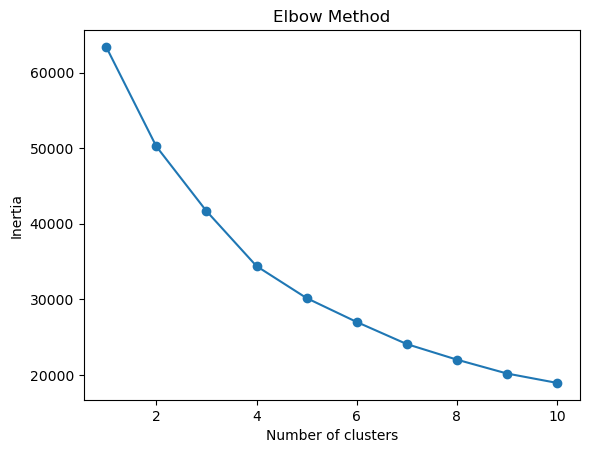

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = ['num_games_owned', 'num_reviews', 'playtime_forever', 'playtime_last_two_weeks', 'playtime_at_review', 'last_played']


# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Determining the number of clusters (k) - Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

#Plotting the Elbow Method 
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o'); plt.title('Elbow Method'); plt.xlabel('Number of clusters'); plt.ylabel('Inertia'); plt.show()



/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 2, Silhouette Score: 0.64


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 3, Silhouette Score: 0.31


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 4, Silhouette Score: 0.32


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 5, Silhouette Score: 0.33


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 6, Silhouette Score: 0.34


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 7, Silhouette Score: 0.35


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 8, Silhouette Score: 0.36


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 9, Silhouette Score: 0.36


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 10, Silhouette Score: 0.34


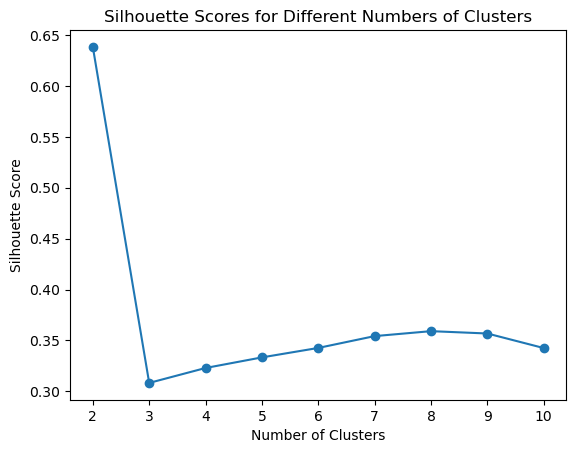

The optimal number of clusters is: 2


In [8]:
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your standardized feature matrix from the previous step
range_n_clusters = list(range(2, 11))  # Starting from 2 since silhouette_score requires at least 2 clusters
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}")

# Plotting the silhouette scores for different numbers of clusters
import matplotlib.pyplot as plt

plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Identify the optimal number of clusters as the one with the highest Silhouette Score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_n_clusters}")


In [9]:
# Choose the k after which the inertia decrease starts to diminish
k_optimal = 2  # Example, adjust based on your Elbow curve

# Clustering with the chosen k
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)




/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Top 15 POS_all base on clusters

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=15,token_pattern='[a-zA-Z0-9]{3,}')  # Adjust as necessary

# Assuming you have a column 'cluster' in your DataFrame that categorizes documents
clusters = df['cluster'].unique()

# Dictionary to hold frequency data for each cluster
cluster_word_frequencies = {}

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features=15,token_pattern='[a-zA-Z0-9]+')  # Adjust token_pattern as needed

# Explode 'attributes_patterns' so each pattern is in its own row
df_exploded = df.explode('cleaned_POS_all')
df_exploded['cleaned_POS_all'] = df_exploded['cleaned_POS_all'].astype(str)

clusters = df['cluster'].unique()
cluster_word_frequencies = {}

for cluster in clusters:
    # Filter the exploded DataFrame by the current cluster
    cluster_texts = df_exploded[df_exploded['cluster'] == cluster]['cleaned_POS_all']
    
    # Check if there are texts in the current cluster to vectorize
    if not cluster_texts.empty:
        # Vectorize the text data of the current cluster
        dtm = vectorizer.fit_transform(cluster_texts)
        feature_names = vectorizer.get_feature_names_out()
        word_frequencies = np.sum(dtm.toarray(), axis=0)
        
        # Create a DataFrame for the current cluster's word frequencies
        frequency_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})
        
        # Sort the DataFrame by frequency in descending order
        frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
        
        # Store the DataFrame in the dictionary
        cluster_word_frequencies[cluster] = frequency_df
# Example: print the top 15 word frequencies for clusters 0 and 1 (if they exist)
if 0 in cluster_word_frequencies:
    print("Cluster 0 Top 15 Word Frequencies:\n", cluster_word_frequencies[0])
if 1 in cluster_word_frequencies:
    print("Cluster 1 Top 15 Word Frequencies:\n", cluster_word_frequencies[1])


Cluster 0 Top 15 Word Frequencies:
          Word  Frequency
0        game        608
1         fun        236
2        play        215
3      friend        132
4        good        109
5      animal         96
6        skin         83
7      player         71
8       party         67
9        time         64
10     people         60
11        map         55
12      great         53
13  recommend         45
14      level         43
Cluster 1 Top 15 Word Frequencies:
       Word  Frequency
0     game       9841
1      fun       4216
2     play       3519
3   friend       2604
4     good       1831
5   animal       1427
6    party       1225
7     time        939
8    great        930
9   people        869
10    gang        823
11    mode        821
12   beast        815
13    skin        778
14  review        769


In [11]:
#output as csv
output_file_path = '/Users/emilywu/Desktop/MMA/Text Analysis/user_segmentation.csv'  # Specify your file path here
df.to_csv(output_file_path, index=False)

/var/folders/_t/sfl_18tn7170tw9l_k83zly40000gn/T/ipykernel_56243/620400235.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='cluster', y=feature, ax=ax, ci=None, palette="coolwarm")
/var/folders/_t/sfl_18tn7170tw9l_k83zly40000gn/T/ipykernel_56243/620400235.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='cluster', y=feature, ax=ax, ci=None, palette="coolwarm")
/var/folders/_t/sfl_18tn7170tw9l_k83zly40000gn/T/ipykernel_56243/620400235.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='cluster', y=feature, ax=ax, ci=None, palette="coolwarm")
/var/folders/_t/sfl_18tn7170tw9l_k83zly40000gn/T/ipykernel_56243/620400235.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='cluster', y=feature, ax=a

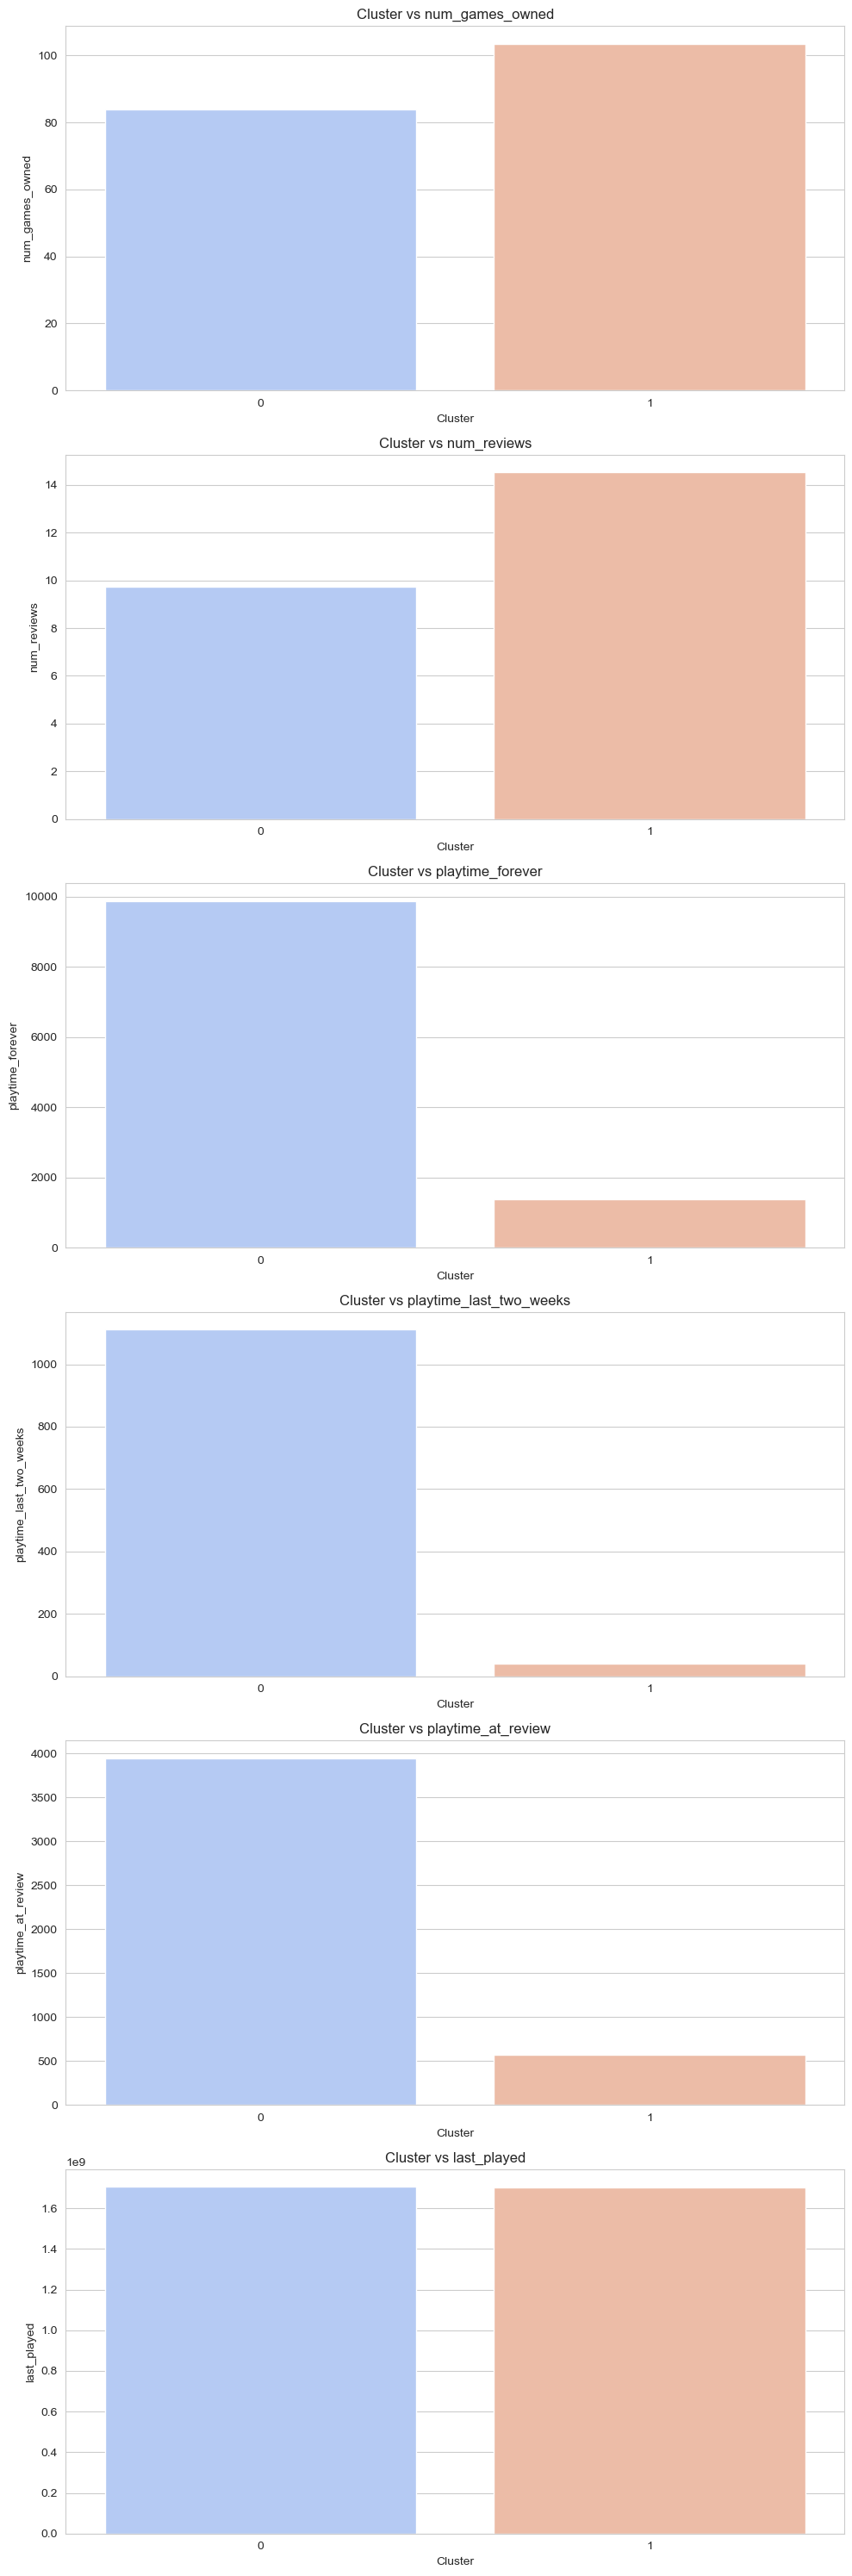

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = ['num_games_owned', 'num_reviews', 'playtime_forever', 'playtime_last_two_weeks', 'playtime_at_review', 'last_played']

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(len(features), 1, figsize=(10, 5 * len(features)))

# Check if there's only one feature to plot to handle indexing
single_plot = len(features) == 1

for i, feature in enumerate(features):
    # Plot each feature in a separate subplot
    ax = axs[i] if not single_plot else axs
    sns.barplot(data=df, x='cluster', y=feature, ax=ax, ci=None, palette="coolwarm")
    ax.set_title(f'Cluster vs {feature}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()
